# Import libs

In [30]:
import deeplake
import librosa.display
import numpy as np
from IPython.display import Audio
from matplotlib import pyplot as plt
from scipy.io import wavfile

# Set global variables to use in the whole project

In [31]:
sample_rate = 16000
wavFileNr = 567

# Get our data and put it in a numpy array

In [32]:
ds = deeplake.load("hub://activeloop/timit-train")
AUDIO_FILE = ds.audios[wavFileNr].numpy()

hub://activeloop/timit-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/timit-train


# Scale the data so it's ready to write

In [33]:
scaled = np.int16(AUDIO_FILE/np.max(np.abs(AUDIO_FILE)) * 32767)
wavfile.write('sound.wav', sample_rate, scaled)
filename = 'sound.wav'

# Play sound

In [34]:
Audio(filename)

# Change from array[int16] to float32

In [35]:
wav = scaled.astype(np.float32) / 32768.0
wav = wav.reshape(-1)
print(wav)

[-0.00039673  0.00079346  0.00161743 ...  0.00079346  0.
  0.        ]


# Show spectrogram

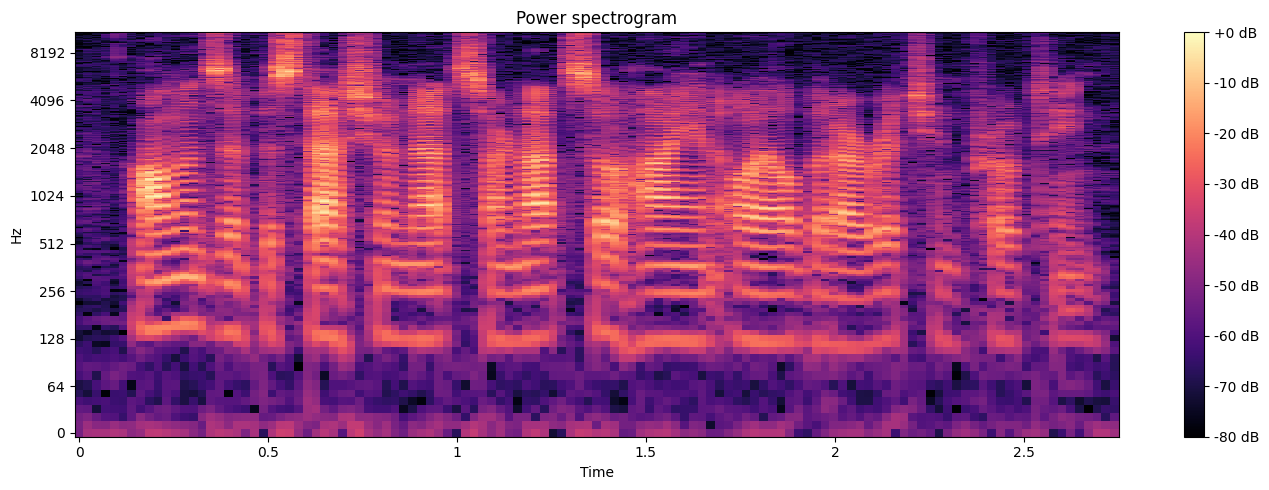

In [36]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(wav)), ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')
plt.tight_layout()
plt.show()

# Show wave

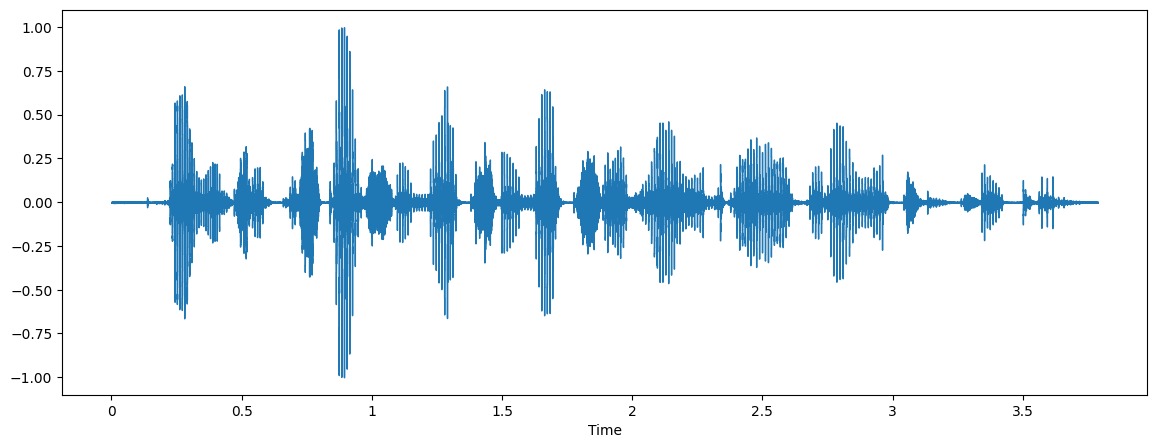

In [37]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(wav, sr=sample_rate)
plt.show()